# Bike Sharing Hourly Data Analysis and Prediction

## Contents

- [Step 1: Import Necessary Libraries](#Step-1-Import-necessary-libraries)
- [Step 2: Data Loading and Initial Exploration](#step-1-data-loading-and-initial-exploration)
  - [Step 2.1: Detecting Anomalies in Bike Rental Counts](#Step-2.1-Detecting-Anomalies-in-Bike-Rental-Counts)
- [Step 3: Data Preprocessing](#step-2-data-preprocessing)
- [Step 4: Data Visualization](#step-3-data-visualization)
  - [Step 4.1: dteday vs cnt](#Step-4.1-dteday-vs-cnt)
  - [Step 4.2: season, mnth, hr, holiday, weekday, workingday features vs cnt](#step-42-season-mnth-hr-holiday-weekday-workingday-features-vs-cnt)
  - [Step 4.3: Environmental Features vs cnt](#step-4-feature-selection-and-visualization)
- [Step 5: Data Transformation](#step-5-data-transformation)
- [Step 6: Correlation Analysis](#step-6-correlation-analysis)
- [Step 7: Data Cleaning](#step-7-data-cleaning)
- [Step 8: Model Training and Evaluation](#step-8-model-training-and-evaluation)
- [Step 9: Model Evaluation Visualization](#step-9-model-evaluation-visualization)


#  Step 1: Import Necessary Libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

# Step 2: Data Loading and Initial Exploration

In [60]:
# ## Load the dataset
data = pd.read_csv("C:\\Users\\nagaj\\Music\\bike+sharing+dataset\\hour.csv")
data.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [62]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Step 2.1: Detecting Anomalies in Bike Rental Counts

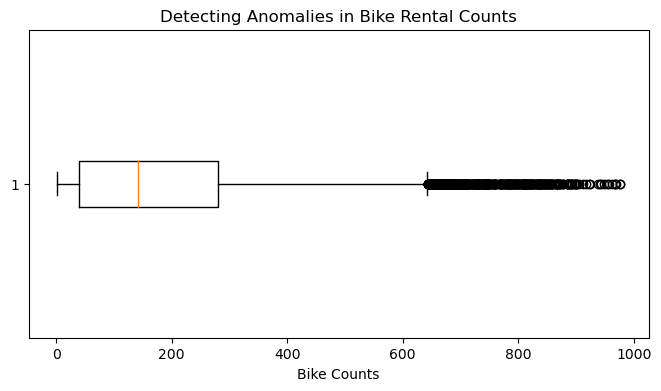

In [63]:
# Extract the bike rental counts
bike_counts = data['cnt']

# Create a boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(bike_counts, vert=False)
plt.title("Detecting Anomalies in Bike Rental Counts")
plt.xlabel("Bike Counts")
plt.show()

# Step 3: Data Preprocessing

In [64]:
## Convert the 'dteday' column to a datetime object
data['dteday'] = pd.to_datetime(data['dteday'])

# Step 4: Data Visualization


# Step 4.1: dteday vs cnt 

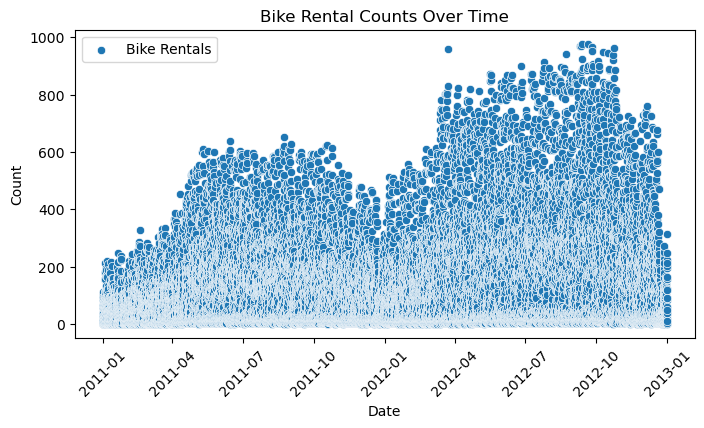

In [65]:
## Plot Bike Rental Counts Over Time
plt.figure(figsize=(8, 4))
sns.scatterplot(x='dteday', y='cnt', data=data, label='Bike Rentals')
plt.title('Bike Rental Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Step 4.2: [season ,  mnth hr holiday weekday workingday]

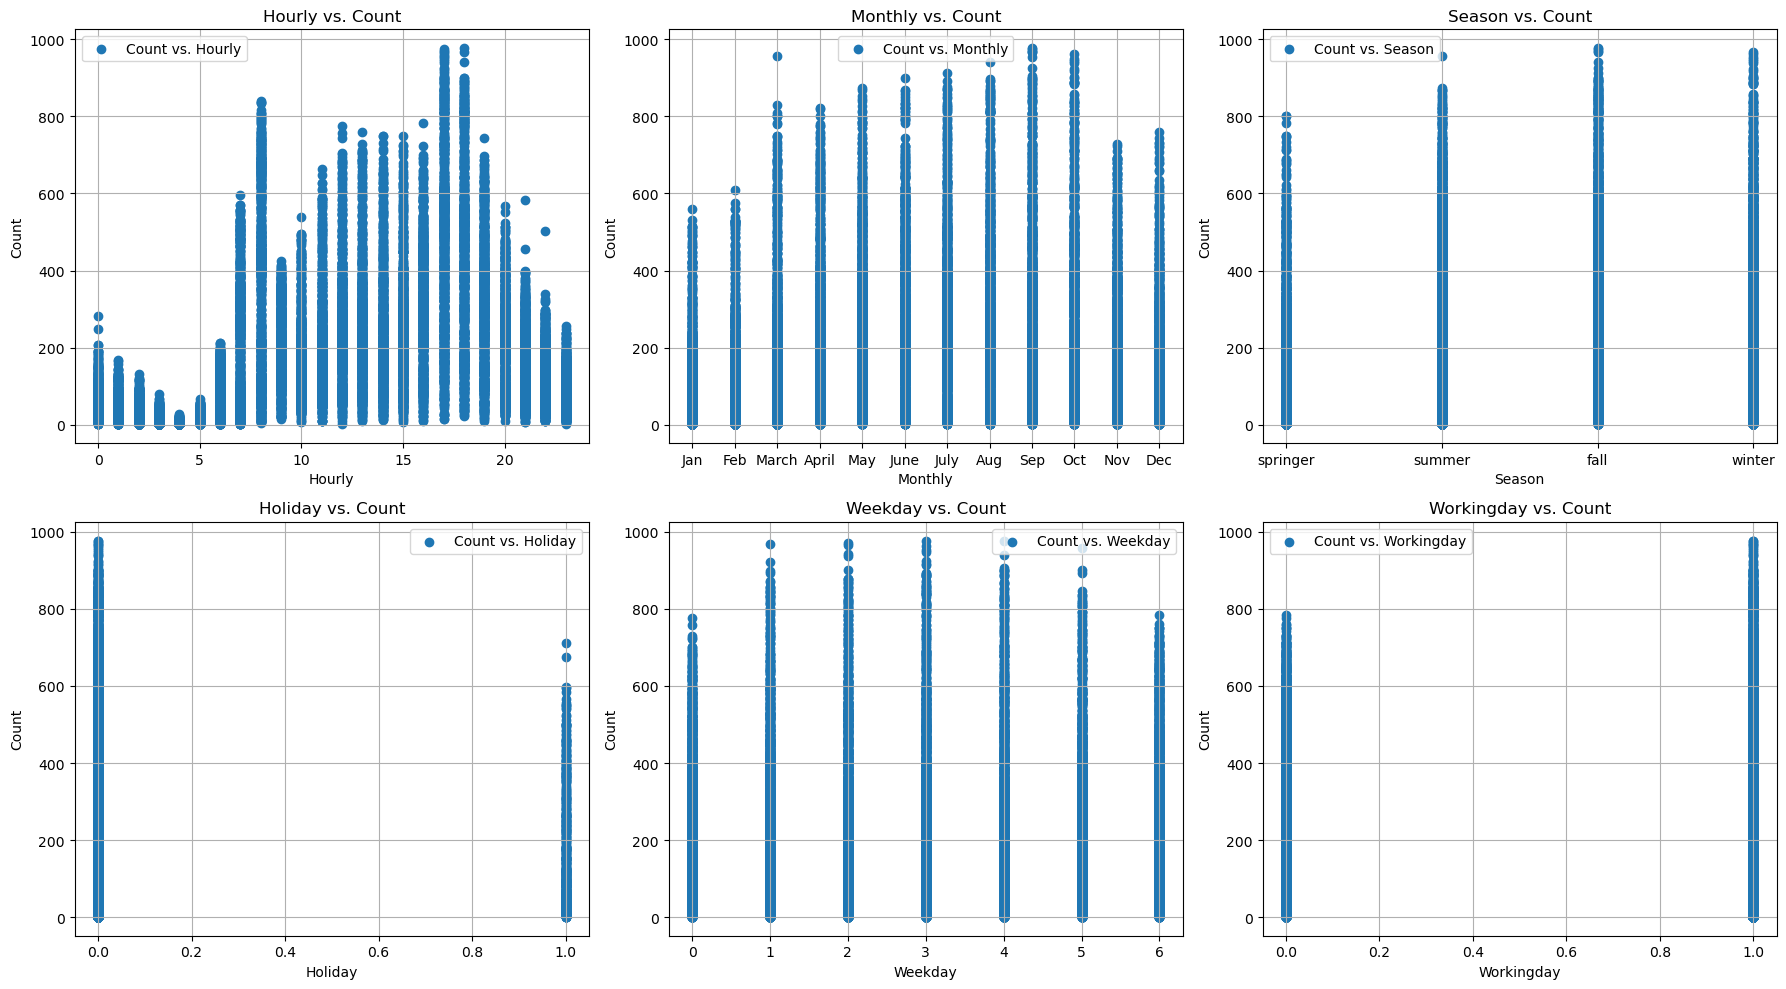

In [66]:
# Create a dictionary to map season numbers to labels
season_labels = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}
month_labels = {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Replace season numbers with labels in the data
data['season'] = data['season'].map(season_labels)

# Define the columns to plot
columns_to_plot = ['hr', 'mnth', 'season', 'holiday', 'weekday', 'workingday']

# Create a figure with six subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Define the order and labels for months
month_order = sorted(data['mnth'].unique())  # Get unique months and sort them
month_names = [month_labels[month] for month in month_order]  # Map month numbers to their labels

# Create labels for the subplots
subplot_labels = ['Hourly', 'Monthly', 'Season', 'Holiday', 'Weekday', 'Workingday']

# Loop to plot the columns
for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(data[column], data['cnt'], marker='o', label=f'Count vs. {subplot_labels[i]}')
    axs[row, col].set_xlabel(subplot_labels[i])
    axs[row, col].set_ylabel('Count')
    axs[row, col].set_title(f'{subplot_labels[i]} vs. Count')
    axs[row, col].legend()
    axs[row, col].grid(True)

    if column == 'mnth':
        axs[row, col].set_xticks(month_order)
        axs[row, col].set_xticklabels(month_names)

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

# Convert string values back to numerical values for 'season' and 'mnth'
data['season'] = data['season'].map({v: k for k, v in season_labels.items()})
data['mnth'] = data['mnth'].map({v: k for k, v in month_labels.items()})

# Step 4.3: Environmental Features vs cnt

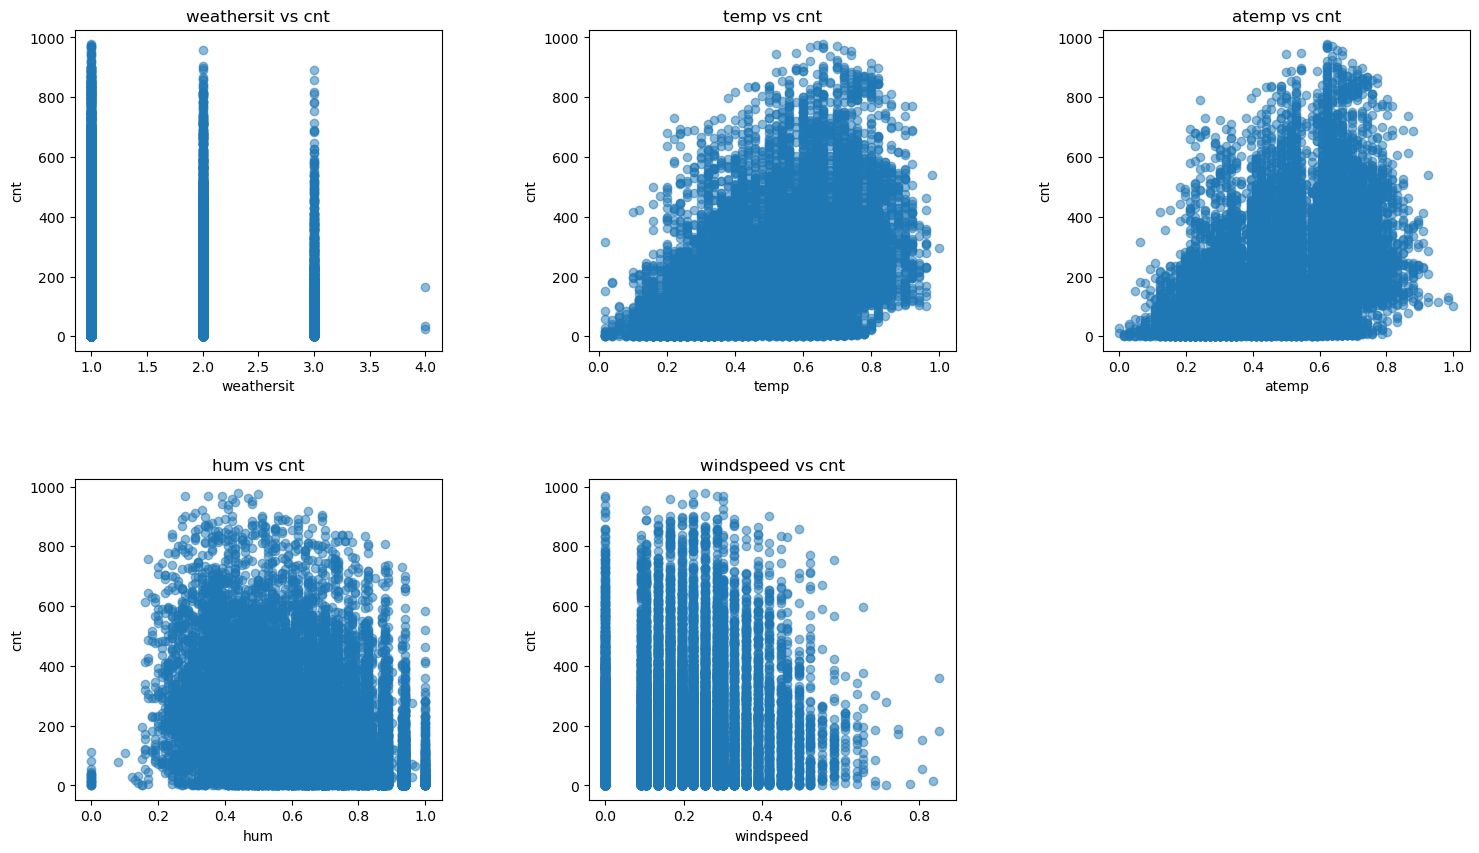

In [77]:
## Selected input features and target variable
selected_features = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed']
target_variable = 'cnt'

## Create subplots for feature vs. target_variable
n_rows = 2  # Number of rows
n_cols = 3  # Number of columns

## Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 10))

for i, feature in enumerate(selected_features):
    # Calculate the subplot position
    row = i // n_cols  # Calculate row index
    col = i % n_cols   # Calculate column index

    # Create a scatter plot for the input feature
    axes[row, col].scatter(data[feature], data[target_variable], alpha=0.5)
    axes[row, col].set_title(f'{feature} vs {target_variable}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(target_variable)

# Remove the (3, 2) subplot
fig.delaxes(axes[1, 2])

# Adjust the layout to prevent overlap and control spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plots
plt.show()


# Step 5: Data Transformation

In [68]:
## Split date into year, month, and day
data['year'] = data['dteday'].dt.year
data['month'] = data['dteday'].dt.month
data['day'] = data['dteday'].dt.day

# Step 6: Correlation Analysis

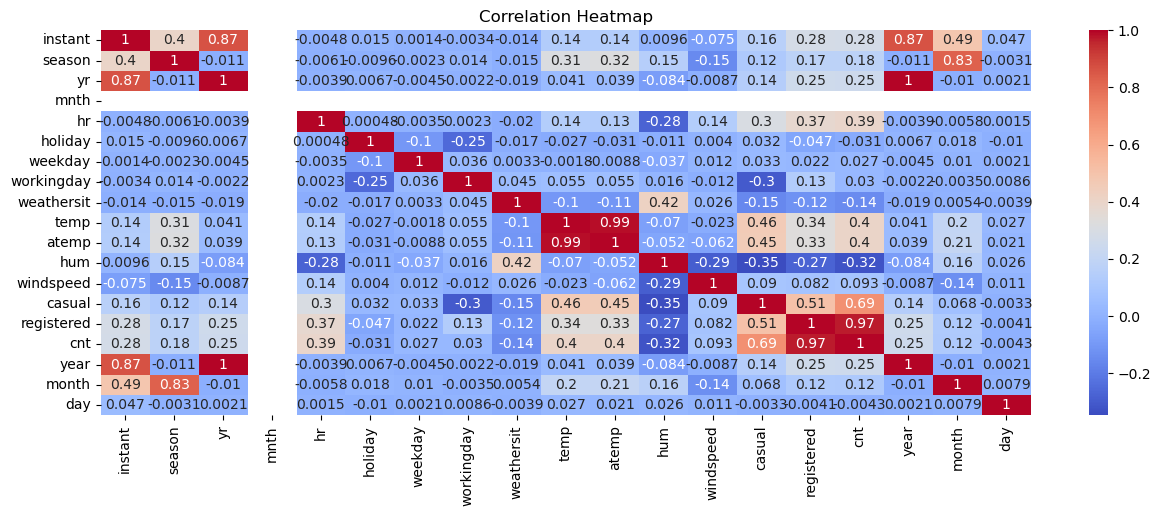

In [69]:
## Calculate and visualize the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Section 7: Data Cleaning

In [70]:
## Dropping unnecessary columns
data = data.drop(['dteday', 'instant', 'yr', 'mnth', 'casual', 'registered'], axis=1)
data.head()


,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,day
0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,2011,1,1
1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,2011,1,1
2,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,2011,1,1
3,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,2011,1,1
4,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,2011,1,1


# Step 8: Model Training and Evaluation


In [71]:
## Split the dataset into features (X) and the target (y)
X = data.drop(['cnt'], axis=1)
y = data['cnt']

## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators= 39, random_state=42)
model.fit(X_train, y_train)

## Make predictions on the test set
y_pred = model.predict(X_test)

## Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 1730.80
R-squared: 0.95


# Step 9: Model Evaluation Visualization

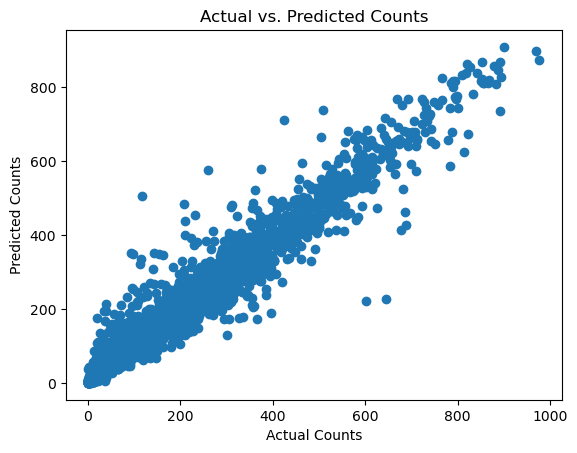

In [72]:
## Visualize the actual vs. predicted counts
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Counts")
plt.ylabel("Predicted Counts")
plt.title("Actual vs. Predicted Counts")
plt.show()